# Práctica NLP

Este trabajo presenta un sistema de clasificación binaria de sentimientos aplicado a reviews de libros de Amazon. El objetivo es predecir si una review es positiva o negativa basándose en el texto escrito por los usuarios.


## 4. Reporte de métricas y conclusiones

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datos del notebook anterior
with open('data_para_ejecutar_ejercicio4.pkl', 'rb') as f:
    results = pickle.load(f)

lr_results = results.get('lr_results')
svm_results = results.get('svm_results')
bert_results = results.get('bert_results')
df = results.get('df')

print("\nResultados:")
if lr_results: print("  - Logistic Regression")
if svm_results: print("  - SVM")
if bert_results: print("  - DistilBERT")


Resultados:
  - Logistic Regression
  - SVM
  - DistilBERT


             Modelo  Accuracy  F1 Negativo  F1 Positivo  Precision Negativo  Recall Negativo  Precision Positivo  Recall Positivo
Logistic Regression     0.824         0.77         0.86                0.82             0.72                0.83             0.89
    SVM (LinearSVC)     0.811         0.75         0.85                0.78             0.73                0.83             0.87
  BERT (DistilBERT)     0.807         0.77         0.83                0.73             0.82                0.87             0.80


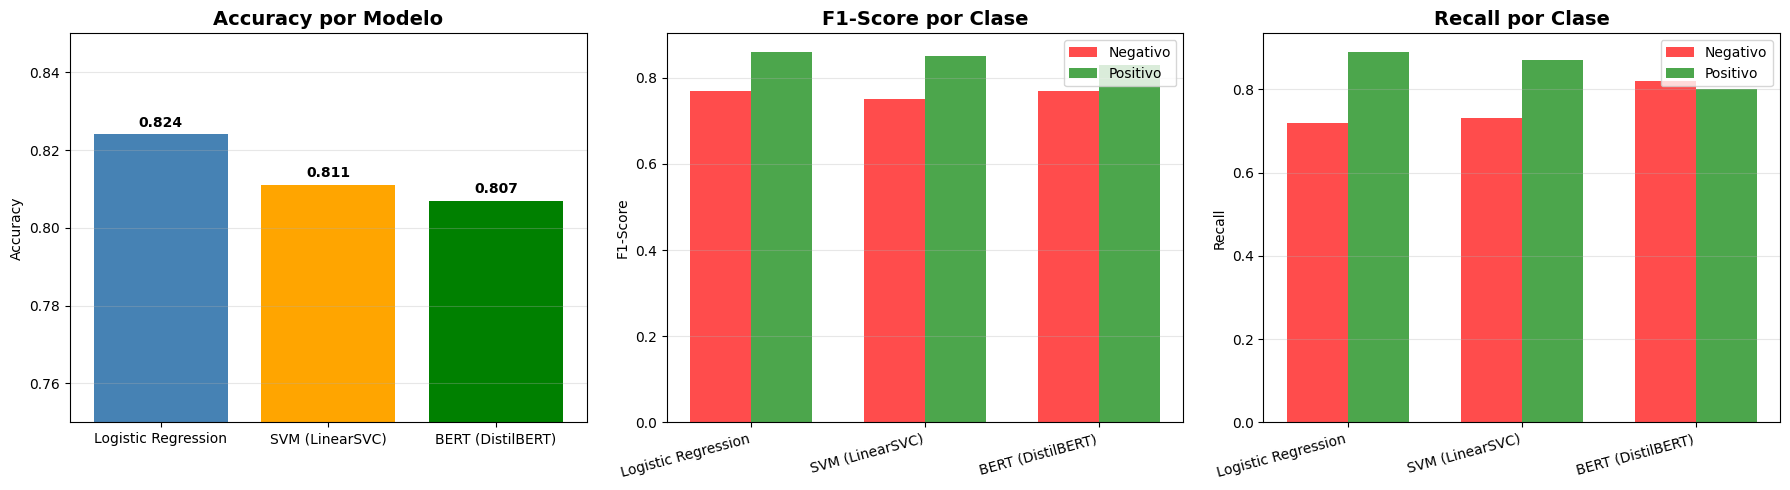

In [3]:
# Comparar modelos

resultados = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'SVM (LinearSVC)', 'BERT (DistilBERT)'],
    'Accuracy': [0.8240, 0.8110, 0.8070],
    'F1 Negativo': [0.77, 0.75, 0.77],
    'F1 Positivo': [0.86, 0.85, 0.83],
    'Precision Negativo': [0.82, 0.78, 0.73],
    'Recall Negativo': [0.72, 0.73, 0.82],
    'Precision Positivo': [0.83, 0.83, 0.87],
    'Recall Positivo': [0.89, 0.87, 0.80]
})

print(resultados.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axes[0].bar(resultados['Modelo'], resultados['Accuracy'], color=['steelblue', 'orange', 'green'])
axes[0].set_title('Accuracy por Modelo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.75, 0.85)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(resultados['Accuracy']):
    axes[0].text(i, v + 0.002, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score por clase
x = range(len(resultados['Modelo']))
width = 0.35
axes[1].bar([i - width/2 for i in x], resultados['F1 Negativo'], width, label='Negativo', color='red', alpha=0.7)
axes[1].bar([i + width/2 for i in x], resultados['F1 Positivo'], width, label='Positivo', color='green', alpha=0.7)
axes[1].set_title('F1-Score por Clase', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(resultados['Modelo'], rotation=15, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Recall comparativo
axes[2].bar([i - width/2 for i in x], resultados['Recall Negativo'], width, label='Negativo', color='red', alpha=0.7)
axes[2].bar([i + width/2 for i in x], resultados['Recall Positivo'], width, label='Positivo', color='green', alpha=0.7)
axes[2].set_title('Recall por Clase', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(x)
axes[2].set_xticklabels(resultados['Modelo'], rotation=15, ha='right')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Este trabajo presenta un sistema de clasificación binaria del sentimiento en reseñas de libros procedentes de Amazon. El objetivo es determinar si una opinión escrita por un usuario puede considerarse positiva o negativa, basándose únicamente en el contenido del texto.

Se ha utilizado un corpus de 5.000 reseñas balanceadas (1.000 por cada puntuación entre 1 y 5 estrellas), obtenido de https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Tras un preprocesamiento realizado con SpaCy, que incluye lematización y eliminación de stopwords para reducir el ruido, el vocabulario se reduce de 44.733 palabras únicas a unas 2.500 features seleccionadas con TF-IDF. Sobre estas representaciones se han entrenado dos modelos de aprendizaje automático clásico (Logistic Regression y SVM). Aparte se ha entrenado un modelo de deep learning basado en BERT.

Los resultados muestran que los modelos más sencillos obtienen un rendimiento superior al modelo de deep learning, algo esperable dado el tamaño limitado del conjunto de datos. Logistic Regression alcanza la mayor precisión (82.4%), seguida de SVM (81.1%) y BERT (80.7%). Además, los modelos clásicos resultan considerablemente más eficientes en tiempo de entrenamiento. Aun así, BERT presenta un mejor recall en la clase negativa que los modelos de ML.

Entre las posibles mejoras futuras se encuentran ampliar el tamaño del corpus y emplear un modelo de deep learning ya afinado específicamente para análisis de sentimiento en reseñas.